**Implementation of Monte Carlo Algorithms (First visit, Exploring Starts and Every visit), Tabular TD(0) and Q-Learning for a Gridworld**

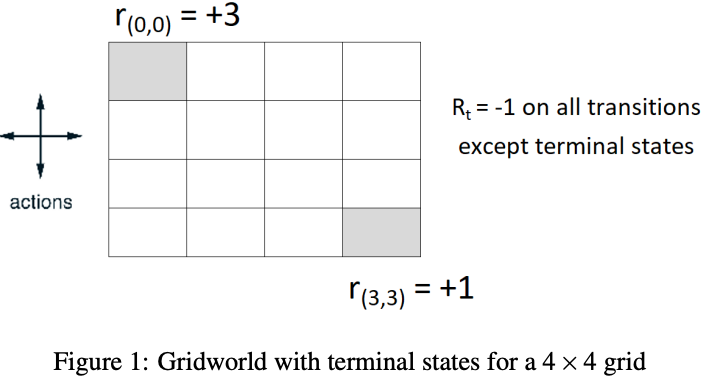


**..................................................**

In [ ]:
'''
gridworld_terminal_DP_helper.py
'''

# libraries
import numpy as np
import sys
from tqdm import tqdm

# state indexing: (x,y) -- for 4x4 grid
# [
#     (0,0), (0,1), (0,2), (0,3)
#     (1,0), (1,1), (1,2), (1,3)
#     (2,0), (2,1), (2,2), (2,3)
#     (3,0), (3,1), (3,2), (3,3)
# ]

# left (0), up (1), right (2), down (3)
v_actions = [np.array([0, -1]),
            np.array([-1, 0]),
            np.array([0, 1]),
            np.array([1, 0])]

i_nActions = len(v_actions)

def target_policy_agent(state, gvPolicy, action=None):
    # print(state, action)
    # return the given action and the prob of selecting that action at given state
    return v_actions[action], gvPolicy[action]

def is_terminal(state, ginDim):
    x, y = state
    return (x == 0 and y == 0) or (x == ginDim - 1 and y == ginDim - 1)

def step(giSt, giAc, ginDim):
    giSt = np.array(giSt)
    next_state = (giSt + giAc).tolist()
    x, y = next_state
    reward = -1

    # if you exit the grid, return the original state
    if x < 0 or x >= ginDim or y < 0 or y >= ginDim:
        next_state = giSt.tolist()

    if (x,y) == (0,0):
      reward = 3
    elif (x,y) == (ginDim-1,ginDim-1):
      reward = 1

    return next_state, reward

def value_iteration_algo(ginDim=4):
    # print("begin: value_iteration_algo")
    
    # initialize
    new_state_values = np.zeros((ginDim, ginDim))
    state_values = new_state_values.copy()
    best_actions = np.zeros((ginDim, ginDim))

    iteration = 1
    while True:
        src = state_values

        for i in range(ginDim):
            for j in range(ginDim):

                if is_terminal([i,j], ginDim) == True:
                    continue

                v_acValues = np.zeros(i_nActions)
                for i_action, action in enumerate(v_actions):
                    (next_i, next_j), reward = step([i, j], action, ginDim)
                    v_acValues[i_action] += reward + src[next_i, next_j]
                
                # print("v_acValues[%s, %s]: %s" %(i,j,v_acValues))
                new_state_values[i, j] = max(v_acValues)
                best_actions[i, j] = np.argmax(v_acValues)
                # print(new_state_values[i, j])
        
        if np.sum(np.abs(new_state_values - state_values)) < 1e-4:
            state_values = new_state_values.copy()
            break
        
        state_values = new_state_values.copy()
        iteration += 1
    
    return iteration, state_values, best_actions

def policy_evaluation_algo(gvPolicy, ginDim=4):
    '''
    gvPolicy (i.e. provided policy) is assumed to be same for each state
    it only describes a probability of taking each action at a given state
    gvPolicy is expected to be in the following form:
    gvPolicy = [1/4, 1/4, 1/4, 1/4]
    '''

    assert sum(gvPolicy) == 1, "error: probability values should sum to 1"
    assert len(gvPolicy) == i_nActions, "error: there should be one probability value for each action"

    # initialize
    new_state_values = np.zeros((ginDim, ginDim))
    state_values = new_state_values.copy()

    iteration = 1
    while True:
        src = state_values

        for i in range(ginDim):
            for j in range(ginDim):

                if is_terminal([i,j], ginDim) == True:
                    continue

                value = 0
                for i_action, action in enumerate(v_actions):
                    (next_i, next_j), reward = step([i, j], action, ginDim)
                    t_action, prob = target_policy_agent((i,j), gvPolicy, action=i_action)
                    # print(i,j, t_action, prob, next_i, next_j)
                    value += prob*(reward + src[next_i, next_j])
                
                # print("v_acValues[%s, %s]: %s" %(i,j,v_acValues))
                new_state_values[i, j] = value
                # print(new_state_values[i, j])
        
        if np.sum(np.abs(new_state_values - state_values)) < 1e-4:
            state_values = new_state_values.copy()
            break
        
        state_values = new_state_values.copy()
        iteration += 1
    
    return iteration, np.around(state_values,1)

iterCt, policy_values = policy_evaluation_algo([0.25, 0.25, 0.25, 0.25 ], ginDim =6 )
print("Number of iterations untill convergence using policy eval:",iterCt,"\nState values using policy eval:\n",policy_values)
iter_Ct, opt_values, opt_policy = value_iteration_algo(ginDim =6 )
print("\nNumber of iterations untill convergence using value iter:",iter_Ct,"\noptimum State values using value iter:\n",opt_values,"\noptimum policy using value iter:\n",opt_policy)

Number of iterations untill convergence using policy eval: 740 
State values using policy eval:
 [[  0.  -30.4 -48.6 -58.5 -63.5 -65.5]
 [-30.4 -42.7 -52.9 -59.3 -62.5 -63.6]
 [-48.6 -52.9 -57.1 -59.3 -59.5 -58.8]
 [-58.5 -59.3 -59.3 -57.3 -53.4 -49.2]
 [-63.5 -62.5 -59.5 -53.4 -43.5 -31.6]
 [-65.5 -63.6 -58.8 -49.2 -31.6   0. ]]

Number of iterations untill convergence using value iter: 6 
optimum State values using value iter:
 [[ 0.  3.  2.  1.  0. -1.]
 [ 3.  2.  1.  0. -1. -2.]
 [ 2.  1.  0. -1. -2. -1.]
 [ 1.  0. -1. -2. -1.  0.]
 [ 0. -1. -2. -1.  0.  1.]
 [-1. -2. -1.  0.  1.  0.]] 
optimum policy using value iter:
 [[0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 3.]
 [1. 0. 0. 0. 2. 3.]
 [1. 0. 0. 2. 2. 3.]
 [1. 0. 2. 2. 2. 0.]]


In [ ]:


'''
gridworld_terminal_MC.py
'''

# libraries
import numpy as np
import sys
from tqdm import tqdm

# # parameters
# ginDim = 4

# state indexing: (x,y) -- for 4x4 grid
# [
#     (0,0), (0,1), (0,2), (0,3)
#     (1,0), (1,1), (1,2), (1,3)
#     (2,0), (2,1), (2,2), (2,3)
#     (3,0), (3,1), (3,2), (3,3)
# ]

# left (0), up (1), right (2), down (3)
v_actions = [np.array([0, -1]),
            np.array([-1, 0]),
            np.array([0, 1]),
            np.array([1, 0])]

i_nActions = len(v_actions)


def is_terminal(state, ginDim):
    x, y = state
    return (x == 0 and y == 0) or (x == ginDim - 1 and y == ginDim - 1)

def get_initial_state(ginDim):
    # print("ginDim:%s" %ginDim)
    while True:
        state_i = np.random.choice(ginDim)
        state_j = np.random.choice(ginDim)
        if (state_i == 0 and state_j == 0) or (state_i == ginDim-1 and state_j == ginDim-1):
            continue
        else:
            break
    return state_i, state_j

def target_policy_agent(state, gvPolicy, action=None):
    # print(state, action)
    if action is None:
        # t_iActionID = np.random.choice(i_nActions)
        t_iActionID = np.random.choice(list(range(i_nActions)), p=gvPolicy)
        # return the selected action and the prob of selection
        return v_actions[t_iActionID], gvPolicy[t_iActionID]
    else:
        # return the given action and the prob of selecting that action at given state
        return v_actions[action], gvPolicy[action]

def mc_travel(ginDim, policy_agent, gvPolicy, initial_state=None, initial_action=None):

    # trajectory of agent
    agent_trajectory = []

    # cumulative_reward
    total_reward = 0

    if initial_state is None:
        # generate a random initial state
        state_i, state_j = get_initial_state(ginDim)
    else:
        state_i, state_j = initial_state
    
    # initial state
    state = (state_i, state_j)

    '''
    complete implementation for the rest of the episode
    starting with below while loop
    '''
    while is_terminal(state, ginDim) == False:
        # get new action
        action,prob = policy_agent(state, gvPolicy)
        agent_trajectory.append(state)
        agent_trajectory.append((action[0],action[1]))
        agent_trajectory.append(-1)
        state_i,state_j = state[0],state[1]
        state_i += action[0]
        state_j += action[1]
        if state_i<0 or state_j<0 or state_i>=ginDim or state_j>=ginDim:
          state_i,state_j = state[0],state[1]
        state = (state_i,state_j)
    agent_trajectory.pop()
    if state==(0,0):
      agent_trajectory.append(3)
    else:
      agent_trajectory.append(1)

    return total_reward, agent_trajectory

def monte_carlo_on_policy_prediction(gvPolicy, episodes=1000, ginDim=4, first_visit_MC=True):

    '''
    gvPolicy (i.e. provided policy) is assumed to be same for each state
    it only describes a probability of taking each action at a given state
    gvPolicy is expected to be in the following form:
    gvPolicy = [1/4, 1/4, 1/4, 1/4]
    '''
    
    # initialize
    state_values = np.zeros((ginDim, ginDim))
    state_counts = np.zeros((ginDim, ginDim))

    # to prevent zero division error
    state_counts[(0,0)] = 1
    state_counts[(ginDim-1,ginDim-1)] = 1

    # travel for several episodes
    for episode in tqdm(range(0, episodes)):
    # for i in range(0, episodes):

        # play the game based on target_policy_player
        reward, agent_trajectory = mc_travel(ginDim, target_policy_agent, gvPolicy)

        '''
        complete implementation for the rest of the episode
        that involves implementing 'first visit check' or 'every visit MC' to record state_values and state_counts for the episode
        '''
        gamma = 0.95
        new_state_values = state_values.copy()
        for i in range(len(agent_trajectory)-1,0,-3):
            reward = gamma*reward+agent_trajectory[i]
            if first_visit_MC and (agent_trajectory[i-2] not in agent_trajectory[:i-2:3]):
                new_state_values[agent_trajectory[i-2]] += reward
                state_counts[agent_trajectory[i-2]] += 1
            elif not first_visit_MC:
                new_state_values[agent_trajectory[i-2]] += reward
                state_counts[agent_trajectory[i-2]] += 1
        if np.sum(np.abs(new_state_values/state_counts - state_values/state_counts)) < 1e-4 and np.sum(np.abs(new_state_values/state_counts - state_values/state_counts)) >0:
            state_values = new_state_values.copy()
            break
        state_values = new_state_values.copy()
    return episode+1, np.around(state_values/state_counts,1)

def monte_carlo_ES(gvPolicy, episodes=1000, ginDim=4, first_visit_MC=True):
    '''
    gvPolicy is used for target policy in an MC control algorithm
    gvPolicy (i.e. provided policy) is assumed to be same for each state
    it only describes a probability of taking each action at a given state
    gvPolicy is expected to be in the following form:
    gvPolicy = [1/4, 1/4, 1/4, 1/4]
    '''
    
    # initialize
    state_action_values = np.zeros((ginDim, ginDim, i_nActions))
    state_action_values_avg = np.zeros((ginDim, ginDim, i_nActions))
    # to avoid zero division error
    state_action_pair_count = np.ones((ginDim, ginDim, i_nActions))
    best_actions = np.zeros((ginDim, ginDim))

    # behaviour policy is greedy
    def behavior_policy(gstate, ggvPolicy=None):
        epsilon_pol = 0.01
        '''
        implement a behavior_policy agent that generates epsilon-greedy policy
        current return value is a placeholder which only generates a random action
        ''' 
        #return v_actions[np.random.choice(list(range(i_nActions)))], 1.0    
        if np.random.random() > epsilon_pol:
            return v_actions[best_actions[gstate].astype(int)], 1.0
        else:
            return v_actions[np.random.choice(list(range(i_nActions)))], 1.0
    
    # travel for several episodes
    for episode in tqdm(range(0, episodes)):
        
        # if episode %1000 == 0:
        #     print("episode: %s" %episode)
        
        # for each episode, use a randomly initialized state and action
        initial_state = get_initial_state(ginDim)
        initial_action = np.random.choice(i_nActions)

        current_policy = behavior_policy if episode else target_policy_agent #######
        # print("initial_state: %s, current_policy(initial_state): %s\n" %(initial_state, current_policy(initial_state)))

        # travel based on current_policy
        reward, agent_trajectory = mc_travel(ginDim, current_policy, gvPolicy)
        # print("agent_trajectory:\n%s\n" %agent_trajectory)

        '''
        complete implementation for the rest of the episode
        that involves implementing 'first visit check' or 'every visit MC' to record state_values and state_counts for the episode
        '''
        new_state_action_values = state_action_values.copy()
        gamma = 0.95
        action_dict = {(0,-1):0, (-1,0):1, (0,1):2, (1,0):3}
        for i in range(len(agent_trajectory)-1,0,-3):
            reward = gamma*reward+agent_trajectory[i]
            if first_visit_MC and all([agent_trajectory[i-2] != agent_trajectory[j] or agent_trajectory[i-1] != agent_trajectory[j+1] for j in range(0,len(agent_trajectory[:i-3]),3)]):
                new_state_action_values[agent_trajectory[i-2][0], agent_trajectory[i-2][1], action_dict[agent_trajectory[i-1]]] += reward
                state_action_pair_count[agent_trajectory[i-2][0], agent_trajectory[i-2][1], action_dict[agent_trajectory[i-1]]] += 1
                best_actions[agent_trajectory[i-2]] = np.argmax(new_state_action_values[agent_trajectory[i-2][0], agent_trajectory[i-2][1], : ])
            elif not first_visit_MC:
                new_state_action_values[agent_trajectory[i-2][0], agent_trajectory[i-2][1], action_dict[agent_trajectory[i-1]]] += reward
                state_action_pair_count[agent_trajectory[i-2][0], agent_trajectory[i-2][1], action_dict[agent_trajectory[i-1]]] += 1
                best_actions[agent_trajectory[i-2]] = np.argmax(new_state_action_values[agent_trajectory[i-2][0], agent_trajectory[i-2][1], : ])
        if np.sum(np.abs((new_state_action_values/state_action_pair_count) - (state_action_values/state_action_pair_count))) < 1e-2 and np.sum(np.abs((new_state_action_values/state_action_pair_count) - (state_action_values/state_action_pair_count)))>0:
            state_action_values = new_state_action_values.copy()
            break
        state_action_values = new_state_action_values.copy()
    state_action_values_avg = state_action_values/state_action_pair_count
    state_values = np.max(state_action_values_avg[:,:,:], axis=-1)
    best_actions = np.argmax(state_action_values_avg[:,:,:], axis=-1)

    return episode, np.around(state_values,1), best_actions


iterCt, policy_values = monte_carlo_on_policy_prediction([0.25, 0.25, 0.25, 0.25], episodes=2000, ginDim=4, first_visit_MC=True)
print("\nNumber of iterations untill convergence using monte carlo policy pred:",iterCt,"\nState values:\n",policy_values)
iter_Ct, opt_values, opt_policy = monte_carlo_ES([0.25,0.25,0.25,0.25], episodes=10000, ginDim=4, first_visit_MC=True)
print("\nNumber of iterations untill convergence using monte carlo exploring starts:",iter_Ct,"\noptimum State values :\n",opt_values,"\noptimum policy :\n",opt_policy)

  0%|          | 0/10000 [00:00<?, ?it/s]


Number of iterations untill convergence using monte carlo policy pred: 1242 
State values:
 [[  0.   -5.2  -8.9  -9.6]
 [ -5.   -7.5  -9.   -8.6]
 [ -8.6  -8.5  -7.7  -5.3]
 [-10.1  -8.8  -5.5   0. ]]


  3%|▎         | 327/10000 [00:00<00:14, 660.86it/s]


Number of iterations untill convergence using monte carlo exploring starts: 681 
optimum State values :
 [[ 0.   3.   1.8  0. ]
 [ 3.   1.8  0.7  0. ]
 [-0.3  0.7  0.   0.7]
 [-6.4 -0.   1.   0. ]] 
optimum policy :
 [[0 0 0 0]
 [1 0 0 0]
 [2 1 3 3]
 [2 2 2 0]]


In [ ]:
iterCt, policy_values = monte_carlo_on_policy_prediction([0.25, 0.25, 0.25, 0.25], episodes=2000, ginDim=4, first_visit_MC=False)
print("\nNumber of iterations untill convergence using monte carlo policy pred (Every visit):",iterCt,"\nState values:\n",policy_values)
iter_Ct, opt_values, opt_policy = monte_carlo_ES([0.25,0.25,0.25,0.25], episodes=10000, ginDim=4, first_visit_MC=False)
print("\nNumber of iterations untill convergence using monte carlo exploring starts (Every visit):",iter_Ct,"\noptimum State values :\n",opt_values,"\noptimum policy :\n",opt_policy)







  0%|          | 0/2000 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:137: RuntimeWarning: invalid value encountered in true_divide






  4%|▍         | 79/2000 [00:00<00:02, 782.19it/s]





  8%|▊         | 158/2000 [00:00<00:02, 783.27it/s]





 15%|█▌        | 302/2000 [00:00<00:01, 907.23it/s]





 22%|██▏       | 440/2000 [00:00<00:01, 1010.22it/s]





 30%|███       | 604/2000 [00:00<00:01, 1138.93it/s]





 38%|███▊      | 751/2000 [00:00<00:01, 1220.90it/s]





 44%|████▎     | 874/2000 [00:00<00:01, 1038.74it/s]





 49%|████▉     | 983/2000 [00:00<00:00, 1104.81it/s]






  0%|          | 0/10000 [00:00<?, ?it/s]





  4%|▍         | 431/10000 [00:00<00:02, 3556.51it/s]


Number of iterations untill convergence using monte carlo policy pred (Every visit): 984 
State values:
 [[  0.   -4.6  -8.9 -10.2]
 [ -5.   -7.5  -9.1  -9.4]
 [ -8.8  -9.   -8.3  -6.1]
 [-10.1  -9.   -6.3   0. ]]

Number of iterations untill convergence using monte carlo exploring starts (Every visit): 563 
optimum State values :
 [[ 0.   3.   1.8  0.7]
 [ 3.   1.8  0.7 -0. ]
 [ 1.   0.7 -0.   1. ]
 [-1.5 -0.   1.   0. ]] 
optimum policy :
 [[0 0 0 0]
 [1 1 1 3]
 [1 1 3 3]
 [1 2 2 0]]


In [ ]:
'''
gridworld_terminal_TD.py
'''

# libraries
import numpy as np
import sys
from tqdm import tqdm

# state indexing: (x,y) -- for 4x4 grid
# [
#     (0,0), (0,1), (0,2), (0,3)
#     (1,0), (1,1), (1,2), (1,3)
#     (2,0), (2,1), (2,2), (2,3)
#     (3,0), (3,1), (3,2), (3,3)
# ]

# left (0), up (1), right (2), down (3)
v_actions = [np.array([0, -1]),
            np.array([-1, 0]),
            np.array([0, 1]),
            np.array([1, 0])]

i_nActions = len(v_actions)

def is_terminal(state, ginDim):
    x, y = state
    return (x == 0 and y == 0) or (x == ginDim - 1 and y == ginDim - 1)

def tabular_TD0(gvPolicy, episodes=100, ginDim=4):
    '''
    implement Tabular TD(0) algorithm for estimating v_{\pi} --- i.e. policy prediction/evaluation algorithm
    '''
    state_values = np.zeros((ginDim, ginDim))
    alpha = 0.01   ##### Learning rate or Step Size...
    gamma = 0.95
    for episode in tqdm(range(0, episodes)):
        initial_state = get_initial_state(ginDim)
        state = initial_state
        new_state_values = state_values.copy()
        while not is_terminal(state,ginDim):
            action = np.random.choice(list(range(i_nActions)),p=gvPolicy)
            action = v_actions[action]
            new_state = (state[0]+action[0],state[1]+action[1])
            if new_state[0]<0 or new_state[0]>ginDim-1 or new_state[1]<0 or new_state[1]>ginDim-1:
                new_state=state
            if new_state==(0,0):
                reward = 3
            elif new_state==(ginDim-1,ginDim-1):
                reward = 1
            else:
                reward = -1
            new_state_values[state] = new_state_values[state] + alpha*(reward + gamma*(new_state_values[new_state]) - new_state_values[state])
            state = new_state
        if np.sum(np.abs(new_state_values-state_values)) < 0.009:  ###### Threshold....
            state_values = new_state_values.copy()
            break
        state_values = new_state_values.copy()

    return episode, np.round(state_values,1)


def q_learning_algo(episodes=100, ginDim=4):
    '''
    implement Q-Learning algorithm
    '''
    state_action_values = np.zeros((ginDim, ginDim, i_nActions))
    alpha = 0.01   ##### Learning rate or Step size..
    gamma = 0.95   
    epsilon = 0.1  #### Epsilon exploration parameter..
    for episode in tqdm(range(0, episodes)):
        initial_state = get_initial_state(ginDim)
        state = initial_state
        new_state_action_values = state_action_values.copy()
        while not is_terminal(state,ginDim):
            if np.random.random() < epsilon:
                act = np.random.choice(list(range(i_nActions)))
            else:
                act = np.argmax(new_state_action_values[state[0],state[1],:])
            action = v_actions[act]
            new_state = (state[0]+action[0],state[1]+action[1])
            if new_state[0]<0 or new_state[0]>ginDim-1 or new_state[1]<0 or new_state[1]>ginDim-1:
                new_state=state
            if new_state==(0,0):
                reward = 3
            elif new_state==(ginDim-1,ginDim-1):
                reward = 1
            else:
                reward = -1
            new_state_action_values[state[0],state[1],act] = new_state_action_values[state[0],state[1],act] + alpha*(reward + gamma*(np.max(new_state_action_values[new_state[0],new_state[1],:],axis=-1) - new_state_action_values[state[0],state[1],act]))
            state = new_state
        if np.sum(np.abs(new_state_action_values-state_action_values)) < 0.001:  ###### Threshold....
            state_action_values = new_state_action_values.copy()
            break
        state_action_values = new_state_action_values.copy()

    return episode, np.round(np.max(state_action_values[:,:,:],axis=-1),1), np.argmax(state_action_values[:,:,:],axis=-1)




iterCt, policy_values = tabular_TD0([0.25, 0.25, 0.25, 0.25], episodes=10000, ginDim=4)
print("\nNumber of iterations untill convergence using tabular TD0",iterCt,"\nState values:\n",policy_values)
iter_Ct, opt_values, opt_policy = q_learning_algo(episodes=10000, ginDim=4)
print("\nNumber of iterations untill convergence using Q Learning",iter_Ct,"\nOptimum State values:\n",opt_values,"\noptimum policy :\n",opt_policy )

  0%|          | 0/10000 [00:00<?, ?it/s]


Number of iterations untill convergence using tabular TD0 36 
State values:
 [[ 0.  -0.2 -0.7 -0.9]
 [ 0.1 -0.4 -0.6 -0.7]
 [-0.6 -0.6 -0.5 -0.3]
 [-0.8 -0.7 -0.3  0. ]]

Number of iterations untill convergence using Q Learning 1006 
Optimum State values:
 [[ 0.   2.7  0.7 -0.4]
 [ 3.1  1.  -0.2 -0.2]
 [ 1.3 -0.2 -0.2  0.9]
 [-0.3 -0.2  0.9  0. ]] 
optimum policy :
 [[0 0 0 0]
 [1 0 0 3]
 [1 0 2 3]
 [1 2 2 0]]
